In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline


In [2]:
from google.colab import files

uploaded = files.upload()

Saving X_seq.csv to X_seq.csv


In [3]:
uploaded2 = files.upload()

Saving Y_seq.csv to Y_seq.csv


In [4]:
#read final cleaned X and Y data sets
X_full=pd.read_csv('X_seq.csv',low_memory=False)
y=pd.read_csv('Y_seq.csv',low_memory=False)

In [5]:
cols_to_drop = [x for x in X_full.columns if 'Unnamed' in x]
X_full = X_full.drop(cols_to_drop, axis=1)
cols_to_drop = [x for x in y.columns if 'Unnamed' in x]
y = y.drop(cols_to_drop, axis=1)

## **Feature Exploration**

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_full, y, random_state=0)

In [7]:
#randomly select dataset by M number of labels
def rand_prototypes(M, train_data, train_labels):
    np.random.seed(10)
    indices = np.random.choice( len(train_labels) , M, replace=False)
    return train_data.iloc[:,indices], indices

In [8]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Random Forest Regressor

In [10]:
rfr=RandomForestRegressor()
# fit model
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
# summarize prediction
print(y_pred[0])

[7.85809831e-04 7.20235756e-02 8.80433098e-01]


In [11]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print(rfr.score(x_test, y_test))

MSE: 0.0007345076413148355
0.8932484318898141


In [12]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfr.feature_importances_):
    feats[feature] = importance 
feat_filter={}
for (key, value) in feats.items():
    if value > 6.0253533696158045e-06: #removed anything with lower importance than a specific run date
        feat_filter[key]=value
feat_sort = sorted(feat_filter.items(), key=lambda x: x[1], reverse=True)


In [13]:
print('5 most important features ranked')
for i in range(5): 
    print('{}: {}'.format(feat_sort[i][0],feat_sort[i][1]))


5 most important features ranked
Avg Mt Align Percent Identical: 0.45071059216751236
Num Align Hqmt Unthreaded At Start Or End Of Bright Cycle: 0.18612598815013784
Num Qc Mt: 0.10823920473288387
Num Align High Acc Mt: 0.09163025411400813
Mode Mt Base Call Read Length Qc Mt: 0.05342882933228649


Text(0.5, 1.0, 'Relationship between feature and target: accuracy')

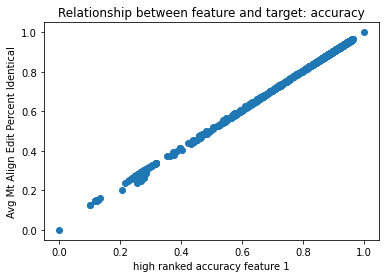

In [ ]:
plt.scatter(X_full['Avg Mt Align Percent Identical'], y['Avg Mt Align Edit Percent Identical'])
plt.xlabel("high ranked accuracy feature 1")
plt.ylabel("Avg Mt Align Edit Percent Identical")
plt.title("Relationship between feature and target: accuracy")

Text(0.5, 1.0, 'Relationship between feature and target: hqmt')

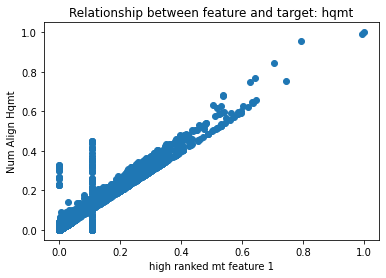

In [ ]:
plt.scatter(X_full['Num Align Hqmt Unthreaded At Start Or End Of Bright Cycle'], y['Num Align Hqmt'])
plt.xlabel("high ranked mt feature 1")
plt.ylabel("Num Align Hqmt")
plt.title("Relationship between feature and target: hqmt")

Text(0.5, 1.0, 'Relationship between feature and target: hqmt')

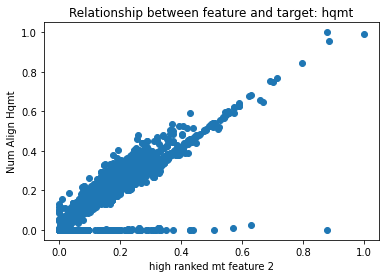

In [ ]:
plt.scatter(X_full['Num Qc Mt'], y['Num Align Hqmt'])
plt.xlabel("high ranked mt feature 2")
plt.ylabel("Num Align Hqmt")
plt.title("Relationship between feature and target: hqmt")

From the plots relationships and the feature imporances, it was decided that the top two features would be removed due to high correlation with the target, which would make it difficult to discover new relationships hidden in the features. Also we filtered out low performing features. Anything with less feature importance score than a one hot encoded feature for run time was removed. 

In [14]:
col_filt=[]
for keys in feat_sort[2:]:
    col_filt.append(keys[0])
#Will use these filtered features for train, test, validation split
X_full[col_filt].head()

,Num Qc Mt,Num Align High Acc Mt,Mode Mt Base Call Read Length Qc Mt,Avg Num Align Hqmt Per Good Cell,Std Mt Base Call Read Length Unthreaded At Start Or End Of Bright Cycle,Avg Mt Base Call Read Length Unthreaded At Start Or End Of Bright Cycle,Mode Mt Base Call Read Length Unthreaded At Start Or End Of Bright Cycle,Percentile90 Mt Base Call Read Length,Percentile75 Mt Base Call Read Length,Num Qc Mt End Adapter Found,...,Run Type_ACAP ONLY,Labcodes Branch Name_6.0.3/seattle,Waveform Params File_/home/genia/projects/labcodes_branch/NSParameters/labcodes/waveform_params_2t_vs_90-375-10p66_200us_3spp_-235mv-10mv-36mv-occal.json,Run Group_TI-RED-HTP,Labcodes Branch SHA_7e3030dbff29dc24fa33eedfd4d466dda85d566a,SBX Pore Name_P-0445,Token_210428_000,Labcodes Version_5.3.6,SBX Pore Stock Name_200618_01,General Params File_/home/genia/projects/labcodes_branch/NSParameters/labcodes/general_params_66XP_21-10uls_20C-10m_45-0p013uls_clean-5p3p6.json
0,0.156277,0.165678,0.366803,0.239986,0.342082,0.497151,0.486503,0.300079,0.372917,0.112826,...,1,1,1,0,0,0,0,0,1,1
1,0.231393,0.250149,0.366803,0.251632,0.342082,0.497151,0.486503,0.298496,0.368750,0.153321,...,1,1,1,0,0,0,0,0,1,1
2,0.198895,0.205300,0.362705,0.239878,0.342082,0.497151,0.486503,0.297704,0.366667,0.124264,...,1,1,1,0,0,0,0,0,1,1
3,0.250057,0.262118,0.370902,0.256029,0.342082,0.497151,0.486503,0.296912,0.365625,0.146954,...,1,0,1,0,0,0,0,0,1,1
4,0.077286,0.106962,0.229508,0.105003,0.338184,0.458741,0.580311,0.182106,0.216667,0.001551,...,0,0,0,0,0,1,0,0,0,0


It's also worth taking a further look into read length to see if we can see why it is harder to predict

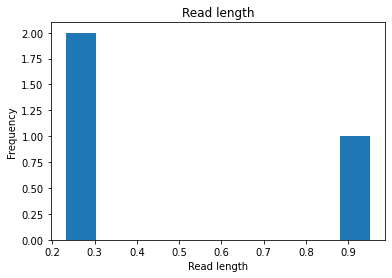

In [15]:
# your turn
plt.hist(y.iloc[1])
plt.title("Read length")
plt.xlabel("Read length")
plt.ylabel("Frequency")
plt.show()

It appears that read length has an "all or nothing" pattern to it such that it is hard to predict from our features when a run can completely fail and produce poor read length. We will keep this in mind as we optimize the model and we may need to accept higher error due to this target. 

We can try training a model for read length only

In [49]:
rfr2=RandomForestRegressor(n_estimators=150, min_samples_leaf=1, min_samples_split=2)
# fit model
rfr2.fit(x_train, y_train.iloc[:,1])
y_pred = rfr2.predict(x_val)
# summarize prediction
print(y_pred[0])
print('MSE: {}'.format(mean_squared_error(y_val.iloc[:,1], y_pred)))
print(rfr2.score(x_val, y_val.iloc[:,1]))

0.16806810740013126
MSE: 0.00023915633312803086
0.9504995893379667


In [50]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfr2.feature_importances_):
    feats[feature] = importance 
feat_filter={}
for (key, value) in feats.items():
    if value > 6.0253533696158045e-06: #removed anything with lower importance than a specific run date
        feat_filter[key]=value
feat_sort = sorted(feat_filter.items(), key=lambda x: x[1], reverse=True)

In [51]:
print('5 most important features ranked')
for i in range(5): 
    print('{}: {}'.format(feat_sort[i][0],feat_sort[i][1]))

5 most important features ranked
Mode Mt Base Call Read Length Qc Mt: 0.5018048895249044
Avg Num Align Hqmt Per Good Cell: 0.0914093923098224
Align Std Called Homopolymer 5 T: 0.04446171782779668
Avg Num Potential Blockages Per Cell: 0.03917336922383829
Percentile75 Mt Base Call Read Length: 0.0370690684792154


## **Prototype Development**

Having refined the dataset more, we can now formally split our data to train, test, and validation data. We will also try to refine our model more now that we have removed some features. We expect some drop in accuracy. We can also try modeling for read length separately if necessary.

In [53]:
x_filt=X_full[col_filt].drop(columns=['Mode Mt Base Call Read Length Qc Mt'])

In [54]:
x_filt.to_csv('X_seq_filt.csv')
files.download('X_seq_filt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
x_train, x_temp, y_train, y_temp = train_test_split(x_filt, y, test_size=0.4, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)


In [62]:
print(np.shape(x_filt))
print(np.shape(x_train))
print(np.shape(x_val))
print(np.shape(x_test))

(5839, 205)
(3503, 205)
(1168, 205)
(1168, 205)


In [58]:
#prototype selection using 100 random features
x_proto, idx=rand_prototypes(100, x_train, x_train.columns)

We use a subsampled dataset to speed up our grid search cross validation and use a successful model from our previous model exploration, random forest regressor. Conceptually, this makes sense for our nonlinear data with may have a very all-or-nothing nature to our targets, namely read length. We can also try modeling for read length only to try to hone in on key features that affect read length in particular.

In [59]:
params =  {'n_estimators':[10, 50 , 100, 150], 'min_samples_split':[2 ,5, 10], 'min_samples_leaf':[1,3, 5]}
clf = GridSearchCV(RandomForestRegressor(), params, cv=5)
rfc = clf.fit(x_proto,y_train)


In [63]:
print("best params:", rfc.best_params_)
y_pred = rfc.predict(x_val.iloc[:,idx])
r2avg=[]
for i in range(len(y_val.columns)):
  r2_i=r2_score(y_val.iloc[:,i], y_pred[:,i])
  print("{} r2 score: {}".format(y_val.columns[i],r2_i))
  r2avg.append(r2_i)
print('Average score: {}'.format(np.average(r2avg)))

best params: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Num Align Hqmt r2 score: 0.9959987309785481
Mode Mt Base Call Read Length Align Hqmt r2 score: 0.9285801994410088
Avg Mt Align Edit Percent Identical r2 score: 0.9711509313580077
Average score: 0.9652432872591882


In [64]:
rfr=RandomForestRegressor(n_estimators=150, min_samples_leaf=1, min_samples_split=2)
# fit model
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_val)
# summarize prediction
print(y_pred[0])
print('MSE: {}'.format(mean_squared_error(y_val, y_pred)))
print(rfr.score(x_val, y_val))

[0.04873085 0.16687623 0.90413989]
MSE: 0.0005358985671333505
0.9393140676091617


Check against the test set

In [69]:
y_pred = rfr.predict(x_test)
# summarize prediction
print(y_pred[0])
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print(rfr.score(x_test, y_test))

[0.40201321 0.23628465 0.94391332]
MSE: 0.0009570353444658983
0.8862748749968562


In [70]:
import pickle
# save the model to disk
filename = 'finalized_seq_model.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [71]:
files.download('finalized_seq_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>